## Time domain processing of LTI systems

For the LTI systems described by the following difference equations, generate its impulse response, and unit step response. Comment on the properties of the system (Stable, Causal)

 <ol>
  <li>$y[n] =    y[n-1] + x[n]  $  </li>
  <li>$y[n] =    x[n]   - x[n-1]$  </li>
  <li>$y[n] = 0.9y[n−1] + x[n]  $  </li>
  <li>$y[n] = \frac{1}{4} \sum_{k=0}^3 x[n-k] $ </li>
</ol>

Also plot the input and output of these systems if you pass the following inputs

 <ol>
  <li>$ \sin\left[ 0.05\pi n  \right] (u[n] - u[n-100])$ </li>
  <li>$ (-1)^n (u[n] - u[n-100]) $ </li>
  <li>$ [(n\%10) -5](u[n] - u[n-100]) $ "%" denotes the reminder of division </li>
  <li>$ (0.9)^n(u[n] - u[n-100]) $ </li>
</ol>

(use function <i>scipy.signal.impulse</i> to determine the impulse response and <i>scipy.signal.lfilter</i> to find the
output)

Details about <i>scipy.signal.impulse</i> can be found here, https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.impulse.html#scipy.signal.impulse

Details about <i>scipy.signal.lfilter</i> can be found here, https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import scipy.signal as sig
n = np.arange(-1,10)
X = [0,1,0,0,0,0,0]
def impulse(n):
    if(n in range(-1,5)):
        return X[n+1]
    else:
        return 0

def unitstep(n):
    if(n >= 0):
        return 1
    else:
        return 0

def summation(np_arr):
    h = np.hstack((np_arr))
    return h

   


Text(0.5, 1.0, 'unit step response')

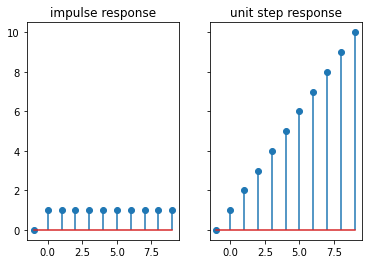

In [46]:
#question 1) h[n] = h[n-1] + delta[n]   delta function is 1 only at n = 0
            #OR pls look at a attached png file for slight modification of original equation to another form (easier to plot)  
# when you replace x with delta for impulse response, we get h[n] = u[n]
x11 = np.array([unitstep(i) for i in n])
h11 = x11

# # question 2) unit[n] = unit[n-1] + u[u]
x1 = np.empty(11)
h21 = np.empty((0,11),int)
for k in range(0,10):
    h21 = np.append(h21,np.array([[unitstep(i - k) for i in n]]),axis = 0)
h21 = np.sum(h21,axis = 0)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  #Sharing Y axis
ax1.stem(n,h11)
ax1.set_title('impulse response')
ax2.stem(n,h21)
ax2.set_title('unit step response')


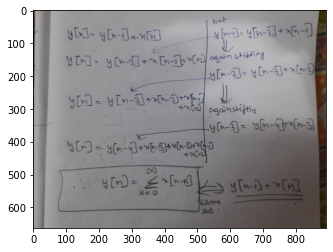

In [27]:
img=mpimg.imread('Q1.png',0)
imgplot = plt.imshow(img)

Text(0.5, 1.0, 'unit step response')

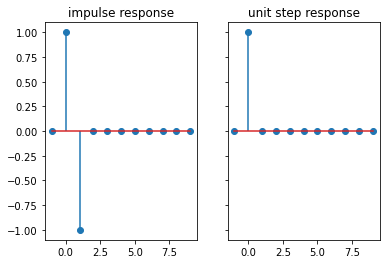

In [28]:
#question 2) h[n] = delta[n] - delta[n-1] 
x21 = np.array([impulse(i) for i in n])
x22 = -1*np.array([impulse(i - 1) for i in n])
h21 = x21 + x22
#question 2) unit[n] = u[n] - u[n-1] 
x21 = np.array([unitstep(i) for i in n])
x22 = -1*np.array([unitstep(i - 1) for i in n])
h22 = x21 + x22

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  #Sharing Y axis
ax1.stem(n,h21)
ax1.set_title('impulse response')
ax2.stem(n,h22)
ax2.set_title('unit step response')




Text(0.5, 1.0, 'unit step response')

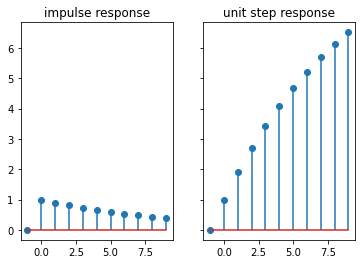

In [52]:
#question 3) h[n] = 0.9*h[n-1] + delta[n]   delta function is 1 only at n = 0
            #OR pls look at a attached png file for slight modification of original equation to another form (easier to plot)

    
x31 = np.power(0.9,n)*np.array([unitstep(i) for i in n])
h31 = x31

#question 3) 
x1 = np.empty(11)
h32 = np.empty((0,11),int)
for k in range(0,10):
    h32 = np.append(h32,np.power(0.9,k)*np.array([[unitstep(i - k) for i in n]]),axis = 0)
h32 = np.sum(h32,axis = 0)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  #Sharing Y axis
ax1.stem(n,h31)
ax1.set_title('impulse response')
ax2.stem(n,h32)
ax2.set_title('unit step response')



Text(0.5, 1.0, 'unit step response')

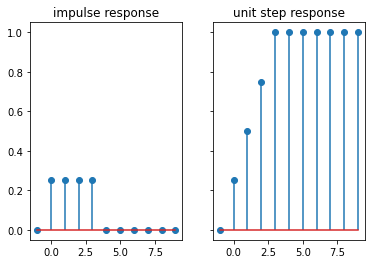

In [50]:
#question 4) h[n] = 1/4 * summation till 3 delta[n - k]

x41 = np.array([unitstep(i) for i in n])
x42 = -1*np.array([unitstep(i - 4) for i in n])
h41 = (0.25)*(x41 + x42)

#quesstion 4) unit[n] = 1/4 * summation till 3 unitstep[n - k]
# h42 = np.vstack((x11,x1,x2,x3))
# h42 = np.sum(h42,axis = 0)
x1 = np.empty(11)
h42 = np.empty((0,11),int)
for k in range(0,4):
    h42 = np.append(h42,np.array([[unitstep(i - k) for i in n]]),axis = 0)
h42 = (0.25)*np.sum(h42,axis = 0)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  #Sharing Y axis
ax1.stem(n,h41)
ax1.set_title('impulse response')
ax2.stem(n,h42)
ax2.set_title('unit step response')

In [ ]:
# MAIN QUESTION 2 (I) X[N] = SIN[0.05pin](u[n] - u[n - 100])


Plot the response of the following filters if the input is 
<ul>
  <li>$x[n] = 0.1n + sin(0.1nπ);    0 ≤ n ≤ 60 $  </li>
</ul> 

<ol>
    <li> $y[n] = \frac{1}{4} \sum_{k=0}^3  x[n − k]$ </li>
    <li>$y[n] = \frac{2}{N(N+1)} \sum_{k=0}^{N−1}(N − k)x[n − k]; N = 4$ </li>
    <li>$y[n] − \alpha y[n − 1] = (1 − \alpha)x[n]; \alpha = 3/4 $ </li>
</ol>
    


Consider a round theatre where an orchestra is in the middle of two concentric circles and the walls on one half side are at a radial distances of $17.15m$ (inner circle) and $34.3m$ (outer circle) on the other side from the
orchestra. The speed of sound is $343 m/s$. Assume that the recorded signal is the sum of the original signal and the attenuated echoes from the two walls and is given by $r[n] = y[n] + 0.8y[n − N1] + 0.6y[n − N2]$ where,
$N1$ is the delay caused by the closest wall and N2 is the delay caused by the farther wall. The recorder is in the centre of the theatre. Take any audio signal available and generate $r[n]$ and listen to both the original and
the echoed signal.